# Chapter: Data Preprocessing

# Topic: Multivariate outlier detection via Mahalanobis distances

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


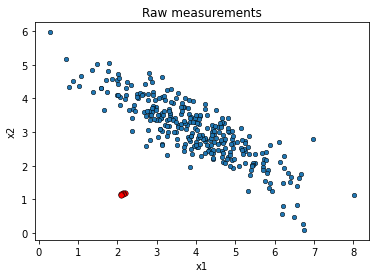

In [2]:
# read data
import numpy as np
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive/')

# %cd "/content/drive/My drive/hanhwa_AA/"

# !git clone https://github.com/SungKu/Hanhwa_AA.git

linkpath = "/content/drive/MyDrive/hanhwa_AA/Hanhwa_AA/1_Cleaning_process_data/"
dirname = os.getcwd()

data_pth = os.path.join(linkpath,'simple2D_outlier.csv')
data_2Doutlier = pd.read_csv(data_pth).values

# plot
import matplotlib.pyplot as plt
plt.plot(data_2Doutlier[:-5,0], data_2Doutlier[:-5,1], '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(data_2Doutlier[-5:,0], data_2Doutlier[-5:,1], '.r', markeredgecolor='k', markeredgewidth=0.5, ms=11)
plt.xlabel('x1'), plt.ylabel('x2')
plt.title('Raw measurements')
plt.show()

In [ ]:
# compute Mahalanobis distances
from sklearn.covariance import EmpiricalCovariance

emp_cov = EmpiricalCovariance().fit(data_2Doutlier)
MD_emp_cov = emp_cov.mahalanobis(data_2Doutlier)

In [ ]:
# transform Mahalanobis distances into normal distribution via cubic-root
MD_cubeRoot = np.power(MD_emp_cov, 0.333)

In [ ]:
# find hampel identifier bounds
from scipy import stats

median = np.median(MD_cubeRoot)
sigma_MAD = stats.median_absolute_deviation(MD_cubeRoot)

upperBound_MD_emp_cov = np.power(median+3*sigma_MAD, 3)
lowerBound_MD_emp_cov = np.power(median-3*sigma_MAD, 3)

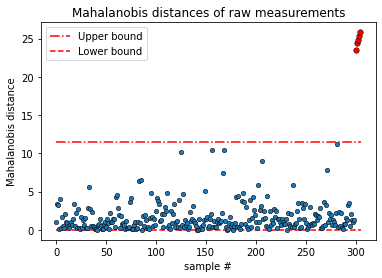

In [ ]:
# plot Mahalanobis distances with bounds (last 5 samples are the outliers)
plt.figure(), plt.plot(MD_emp_cov[:-5], '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(np.arange(300,305), MD_emp_cov[-5:], '.r', markeredgecolor='k', markeredgewidth=0.5, ms=11)

plt.hlines(upperBound_MD_emp_cov, 0, 305, colors='r', linestyles='dashdot', label='Upper bound') 
plt.hlines(lowerBound_MD_emp_cov, 0, 305, colors='r', linestyles='dashed', label='Lower bound') 

plt.xlabel('sample #'), plt.ylabel('Mahalanobis distance')
plt.title('Mahalanobis distances of raw measurements')
plt.legend(loc='upper left')
plt.show()